# Real Interest Rate (%) 
La tasa de interés real, ajustada por la inflación, puede ser más relevante que la nominal para decisiones económicas como el ahorro y la inversión, ya que refleja el costo del capital en términos reales.
**La tasa de interés real refleja el costo del dinero descontando el efecto de la inflación.**

Es fundamental considerar los resultados de diagnóstico y validación de modelos como los **criterios de información de Akaike (AIC)** y el **criterio de información bayesiano (BIC)** para comparar modelos con y sin estas variables incluidas, y así elegir el modelo que ofrece la mejor combinación de ajuste y parsimonia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interest = pd.read_excel('Interest.xlsx')
interest

Country Name Country Code  1960      1961      1962  \
0                          Aruba          ABW   NaN       NaN       NaN   
1    Africa Eastern and Southern          AFE   NaN       NaN       NaN   
2                    Afghanistan          AFG   NaN       NaN       NaN   
3     Africa Western and Central          AFW   NaN       NaN       NaN   
4                         Angola          AGO   NaN       NaN       NaN   
..                           ...          ...   ...       ...       ...   
261                       Kosovo          XKX   NaN       NaN       NaN   
262                  Yemen, Rep.          YEM   NaN       NaN       NaN   
263                 South Africa          ZAF   NaN  5.200152  6.013274   
264                       Zambia          ZMB   NaN       NaN       NaN   
265                     Zimbabwe          ZWE   NaN       NaN       NaN   

         1963      1964      1965      1966      1967  ...       2013  \
0         NaN       NaN       NaN       NaN       NaN  ...  10.709708   
1         NaN       NaN       NaN       NaN       NaN  ...        NaN   
2         NaN       NaN       NaN       NaN       NaN  ...   9.784496   
3         NaN       NaN       NaN       NaN       NaN  ...        NaN   
4         NaN       NaN       NaN       NaN       NaN  ...  12.610802   
..        ...       ...       ...       ...       ...  ...        ...   
261       NaN       NaN       NaN       NaN       NaN  ...  11.426523   
262       NaN       NaN       NaN       NaN       NaN  ...  11.788755   
263  2.423273  3.667879  3.800071  3.246208  4.231877  ...   2.509245   
264       NaN       NaN       NaN       NaN       NaN  ...  -0.191720   
265       NaN       NaN       NaN       NaN       NaN  ...   1.525435   

          2014       2015       2016       2017       2018       2019  \
0     3.213869   0.157925   7.982851   9.789287   2.437682  -0.371564   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2    14.351689  12.252548  17.583938  12.141178        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4    12.380530  21.144182  -4.922063  -5.552638  -5.844003   0.090919   
..         ...        ...        ...        ...        ...        ...   
261   8.871488   7.665566   6.615990   6.364676   5.079008        NaN   
262        NaN        NaN        NaN        NaN        NaN        NaN   
263   3.567028   3.667743   3.278252   4.647315   5.856184   5.268416   
264   5.821128   6.179216   1.715079   2.070262   2.215865   2.469674   
265   8.787605   8.144427   4.998563   3.742846 -64.380817 -64.295151   

          2020       2021       2022  
0     7.738755  11.988410   2.598476  
1          NaN        NaN        NaN  
2          NaN        NaN        NaN  
3          NaN        NaN        NaN  
4     8.028657 -13.989372   3.277431  
..         ...        ...        ...  
261        NaN        NaN        NaN  
262        NaN        NaN        NaN  
263   2.326407   0.508486   3.848990  
264  -3.749081        NaN        NaN  
265 -81.132121 -31.795551 -36.416439  

[266 rows x 65 columns]

In [2]:
interest.shape, interest.columns, interest.dtypes, interest.info(), interest.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          0 non-null      float64
 3   1961          4 non-null      float64
 4   1962          4 non-null      float64
 5   1963          4 non-null      float64
 6   1964          4 non-null      float64
 7   1965          5 non-null      float64
 8   1966          5 non-null      float64
 9   1967          6 non-null      float64
 10  1968          6 non-null      float64
 11  1969          7 non-null      float64
 12  1970          8 non-null      float64
 13  1971          9 non-null      float64
 14  1972          9 non-null      float64
 15  1973          9 non-null      float64
 16  1974          9 non-null      float64
 17  1975          11 non-null     float64
 18  1976          18 non-null     

((266, 65),
 Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
        '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
        '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
        '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
        '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
        '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
        '2019', '2020', '2021', '2022'],
       dtype='object'),
 Country Name     object
 Country Code     object
 1960            float64
 1961            float64
 1962            float64
                  ...   
 2018            float64
 2019            float64
 2020            float64
 2021            float64
 2022            float64
 Length: 65, dtype: object,
 None,
        1960      1961      1962      1963      1964 

### Nombres de las hojas Excel

In [3]:
import pandas as pd

file_path = 'Interest.xlsx'
data = pd.read_excel(file_path, sheet_name=None)  

sheet_names = data.keys()
sheet_names

dict_keys(['Data', 'Metadata - Countries', 'Metadata - Indicators'])

### Imputación con Mediana a valores NaN

In [5]:
# Verificar cuáles columnas todavía tienen valores no positivos y cuántos son
non_positive_counts = (interest_imputed[years_columns] <= 0).sum()
non_positive_columns = non_positive_counts[non_positive_counts > 0]

if not non_positive_columns.empty:
    print("Columnas con valores no positivos y su cantidad:")
    print(non_positive_columns)
else:
    print("No hay valores no positivos, la imputación ha sido exitosa.")

Columnas con valores no positivos y su cantidad:
1969     1
1970     2
1971     1
1972     1
1973     7
1974     8
1975     8
1976     8
1977     7
1978    10
1979    16
1980    15
1981     7
1982     8
1983     8
1984    11
1985    13
1986     9
1987    14
1988    18
1989    14
1990    16
1991    16
1992    14
1993    16
1994    15
1995    17
1996    12
1997     8
1998     7
1999    13
2000    20
2001     8
2002     9
2003    17
2004    20
2005    27
2006    25
2007    29
2008    48
2009     8
2010    28
2011    39
2012    14
2013    10
2014     9
2015     8
2016     9
2017    15
2018    16
2019     7
2020     9
2021    35
2022    40
dtype: int64


In [6]:
# Asegurarse de que la mediana calculada es siempre positiva
for column in years_columns:
    positive_values = interest_imputed[column][interest_imputed[column] > 0]
    median_val = positive_values.median() if not positive_values.empty else 0.01

    # Imputar los valores NaN y los valores no positivos
    interest_imputed[column] = interest_imputed[column].apply(lambda x: median_val if x <= 0 or pd.isna(x) else x)

# Verificación final para asegurarse de que no hay valores no positivos
non_positive_counts = (interest_imputed[years_columns] <= 0).sum()
non_positive_columns = non_positive_counts[non_positive_counts > 0]
if not non_positive_columns.empty:
    print("Columnas con valores no positivos y su cantidad:")
    print(non_positive_columns)
else:
    print("No hay valores no positivos, la imputación ha sido exitosa.")

No hay valores no positivos, la imputación ha sido exitosa.


In [7]:
interest_imputed

Country Name Country Code  1960      1961      1962  \
0                          Aruba          ABW  0.01  3.096115  4.962287   
1    Africa Eastern and Southern          AFE  0.01  3.096115  4.962287   
2                    Afghanistan          AFG  0.01  3.096115  4.962287   
3     Africa Western and Central          AFW  0.01  3.096115  4.962287   
4                         Angola          AGO  0.01  3.096115  4.962287   
..                           ...          ...   ...       ...       ...   
261                       Kosovo          XKX  0.01  3.096115  4.962287   
262                  Yemen, Rep.          YEM  0.01  3.096115  4.962287   
263                 South Africa          ZAF  0.01  5.200152  6.013274   
264                       Zambia          ZMB  0.01  3.096115  4.962287   
265                     Zimbabwe          ZWE  0.01  3.096115  4.962287   

         1963      1964      1965      1966      1967  ...       2013  \
0    3.325525  2.893762  2.565913  2.649421  2.531959  ...  10.709708   
1    3.325525  2.893762  2.565913  2.649421  2.531959  ...   6.364143   
2    3.325525  2.893762  2.565913  2.649421  2.531959  ...   9.784496   
3    3.325525  2.893762  2.565913  2.649421  2.531959  ...   6.364143   
4    3.325525  2.893762  2.565913  2.649421  2.531959  ...  12.610802   
..        ...       ...       ...       ...       ...  ...        ...   
261  3.325525  2.893762  2.565913  2.649421  2.531959  ...  11.426523   
262  3.325525  2.893762  2.565913  2.649421  2.531959  ...  11.788755   
263  2.423273  3.667879  3.800071  3.246208  4.231877  ...   2.509245   
264  3.325525  2.893762  2.565913  2.649421  2.531959  ...   6.364143   
265  3.325525  2.893762  2.565913  2.649421  2.531959  ...   1.525435   

          2014       2015       2016       2017      2018      2019      2020  \
0     3.213869   0.157925   7.982851   9.789287  2.437682  6.824167  7.738755   
1     6.971553   6.711871   6.691411   5.327609  6.054143  6.824167  7.154647   
2    14.351689  12.252548  17.583938  12.141178  6.054143  6.824167  7.154647   
3     6.971553   6.711871   6.691411   5.327609  6.054143  6.824167  7.154647   
4    12.380530  21.144182   6.691411   5.327609  6.054143  0.090919  8.028657   
..         ...        ...        ...        ...       ...       ...       ...   
261   8.871488   7.665566   6.615990   6.364676  5.079008  6.824167  7.154647   
262   6.971553   6.711871   6.691411   5.327609  6.054143  6.824167  7.154647   
263   3.567028   3.667743   3.278252   4.647315  5.856184  5.268416  2.326407   
264   5.821128   6.179216   1.715079   2.070262  2.215865  2.469674  7.154647   
265   8.787605   8.144427   4.998563   3.742846  6.054143  6.824167  7.154647   

          2021      2022  
0    11.988410  2.598476  
1     4.552545  3.277431  
2     4.552545  3.277431  
3     4.552545  3.277431  
4     4.552545  3.277431  
..         ...       ...  
261   4.552545  3.277431  
262   4.552545  3.277431  
263   0.508486  3.848990  
264   4.552545  3.277431  
265   4.552545  3.277431  

[266 rows x 65 columns]

Los indicadores económicos, como las **tasas de interés** o índices económicos similares, pueden fluctuar entre positivos y negativos dependiendo de múltiples factores económicos y políticos. Esto puede hacer que los **métodos de imputación** estándar (como usar la mediana o la media de valores positivos) sean **desafiantes** si una proporción significativa de los datos en ciertos años es negativa o cero.

### Reverificar los valores faltantes

In [8]:
missing_values_count = interest_imputed.isnull().sum()
print(missing_values_count)

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
               ..
2018            0
2019            0
2020            0
2021            0
2022            0
Length: 65, dtype: int64


### Estandarización de las Variables

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

years_columns = interest_imputed.columns[2:]

interest_imputed[years_columns] = scaler.fit_transform(interest_imputed[years_columns])

interest_imputed[years_columns].describe()

1960          1961          1962          1963          1964  \
count  266.0  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean     0.0  3.739699e-16  1.649474e-15 -1.244785e-14 -6.357488e-15   
std      0.0  1.001885e+00  1.001885e+00  1.001885e+00  1.001885e+00   
min      0.0 -6.385031e+00 -1.282952e+01 -1.583227e+01 -1.354863e+01   
25%      0.0 -3.262441e-02  1.924342e-02  4.617365e-02  1.713532e-02   
50%      0.0 -3.262441e-02  1.924342e-02  4.617365e-02  1.713532e-02   
75%      0.0 -3.262441e-02  1.924342e-02  4.617365e-02  1.713532e-02   
max      0.0  1.499787e+01  7.749259e+00  3.642429e+00  9.024909e+00   

               1965          1966          1967          1968          1969  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean  -3.692952e-15  1.555982e-15  2.270531e-16 -2.118606e-15  3.185422e-15   
std    1.001885e+00  1.001885e+00  1.001885e+00  1.001885e+00  1.001885e+00   
min   -7.452167e+00 -8.897646e+00 -2.725614e+00 -7.809848e+00 -6.973438e+00   
25%   -1.625838e-02 -2.818381e-02 -5.270328e-02 -2.421555e-02 -5.614239e-03   
50%   -1.625838e-02 -2.818381e-02 -5.270328e-02 -2.421555e-02 -5.614239e-03   
75%   -1.625838e-02 -2.818381e-02 -5.270328e-02 -2.421555e-02 -5.614239e-03   
max    1.404676e+01  1.328467e+01  1.584081e+01  1.223109e+01  1.026536e+01   

       ...          2013          2014          2015          2016  \
count  ...  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   ... -1.953325e-16 -3.339017e-17  8.013640e-17 -1.619423e-16   
std    ...  1.001885e+00  1.001885e+00  1.001885e+00  1.001885e+00   
min    ... -1.606751e+00 -1.315685e+00 -1.172917e+00 -1.465396e+00   
25%    ... -1.755166e-01 -1.436222e-01 -2.034767e-01 -1.550272e-01   
50%    ... -1.755166e-01 -1.436222e-01 -2.034767e-01 -1.550272e-01   
75%    ... -1.755166e-01 -1.436222e-01 -2.034767e-01 -1.550272e-01   
max    ...  1.016155e+01  9.671081e+00  7.766354e+00  8.513813e+00   

               2017          2018          2019          2020          2021  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean  -9.349247e-17  2.136971e-16 -1.719594e-16 -2.554348e-16  1.001705e-16   
std    1.001885e+00  1.001885e+00  1.001885e+00  1.001885e+00  1.001885e+00   
min   -1.217499e+00 -1.435029e+00 -1.897474e+00 -1.514035e+00 -1.618711e+00   
25%   -1.472724e-01 -1.283404e-01 -9.690763e-02 -1.410427e-01 -1.296735e-01   
50%   -1.472724e-01 -1.283404e-01 -9.690763e-02 -1.410427e-01 -1.296735e-01   
75%   -1.472724e-01 -1.283404e-01 -9.690763e-02 -1.410427e-01 -1.296735e-01   
max    9.493495e+00  8.775298e+00  8.741915e+00  7.879403e+00  1.145367e+01   

               2022  
count  2.660000e+02  
mean   2.404092e-16  
std    1.001885e+00  
min   -1.205143e+00  
25%   -1.003136e-01  
50%   -1.003136e-01  
75%   -1.003136e-01  
max    1.169665e+01  

[8 rows x 63 columns]

### Verificación de Estacionariedad
Prueba Dickey-Fuller Aumentada (ADF):

In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

years_columns = interest_imputed.columns[2:]  

adf_results = {}

for column in years_columns:
    adf_result = adfuller(interest_imputed[column].dropna())
    adf_results[column] = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4],
        '1%': adf_result[4]['1%'],  # Valor crítico para un nivel de confianza del 99%
        '5%': adf_result[4]['5%'],  # Valor crítico para un nivel de confianza del 95%
        '10%': adf_result[4]['10%']  # Valor crítico para un nivel de confianza del 90%
    }

adf_results_df = pd.DataFrame(adf_results).transpose()

print(adf_results_df)

C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


     ADF Statistic p-value                                    Critical Values  \
1960           NaN     NaN  {'1%': -3.4552699038400827, '5%': -2.872509235...   
1961     -16.23461     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   
1962     -6.617324     0.0  {'1%': -3.456360306409983, '5%': -2.8729872043...   
1963    -16.252018     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   
1964    -16.222055     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   
...            ...     ...                                                ...   
2018     -8.475688     0.0  {'1%': -3.4554613060274972, '5%': -2.872593147...   
2019    -15.652274     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   
2020    -16.683117     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   
2021    -16.865601     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   
2022    -15.253762     0.0  {'1%': -3.4552699038400827, '5%': -2.872509235...   

            1%        5%   

### ADF Anual

In [11]:
for year, results in adf_results.items():
    if isinstance(results, dict):  
        print(f"Resultados ADF para el año {year}:")
        print(f"ADF Statistic: {results['ADF Statistic']}")
        print(f"p-value: {results['p-value']:.2e}")  
        print("Critical Values:")
        for key, value in results['Critical Values'].items():
            print(f"  {key}: {value}")
        print()  # Añadir una línea en blanco para separar años
    else:
        print(f"No data available for ADF test in year {year}")

Resultados ADF para el año 1960:
ADF Statistic: nan
p-value: nan
Critical Values:
  1%: -3.4552699038400827
  5%: -2.8725092359464526
  10%: -2.5726152830188678

Resultados ADF para el año 1961:
ADF Statistic: -16.234610098052865
p-value: 3.78e-29
Critical Values:
  1%: -3.4552699038400827
  5%: -2.8725092359464526
  10%: -2.5726152830188678

Resultados ADF para el año 1962:
ADF Statistic: -6.617324275902844
p-value: 6.16e-09
Critical Values:
  1%: -3.456360306409983
  5%: -2.8729872043802356
  10%: -2.572870232500465

Resultados ADF para el año 1963:
ADF Statistic: -16.252018027680286
p-value: 3.64e-29
Critical Values:
  1%: -3.4552699038400827
  5%: -2.8725092359464526
  10%: -2.5726152830188678

Resultados ADF para el año 1964:
ADF Statistic: -16.22205512042639
p-value: 3.89e-29
Critical Values:
  1%: -3.4552699038400827
  5%: -2.8725092359464526
  10%: -2.5726152830188678

Resultados ADF para el año 1965:
ADF Statistic: -16.22157828518153
p-value: 3.89e-29
Critical Values:
  1%: -3

### Remove rows
Indicadores que no se usarán

In [12]:
rows_to_remove = [
    "East Asia & Pacific (excluding high income)", 
    "Early-demographic dividend", 
    "Europe & Central Asia (excluding high income)", 
    "Fragile and conflict affected situations", 
    "High income", 
    "Heavily indebted poor countries (HIPC)", 
    "IBRD only", 
    "IDA & IBRD total", 
    "IDA total", 
    "IDA blend", 
    "IDA only", 
    "Not classified", 
    "Latin America & Caribbean (excluding high income)", 
    "Least developed countries: UN classification", 
    "Low income", 
    "Lower middle income", 
    "Low & middle income", 
    "Late-demographic dividend", 
    "Middle East & North Africa (excluding high income)", 
    "Pre-demographic dividend", 
    "Post-demographic dividend", 
    "East Asia & Pacific (IDA & IBRD countries)", 
    "Europe & Central Asia (IDA & IBRD countries)", 
    "Latin America & the Caribbean (IDA & IBRD countries)", 
    "Middle East & North Africa (IDA & IBRD countries)", 
    "Sub-Saharan Africa (IDA & IBRD countries)", 
    "Upper middle income"
]

interest_filtered = interest_imputed[~interest_imputed['Country Name'].isin(rows_to_remove)]

print(interest_filtered.head())
print(interest_filtered['Country Name'].unique())  
print("Original size:", interest_imputed.shape)
print("Filtered size:", interest_filtered.shape)

interest_filtered.to_csv('main_interest.csv', index=False) # DataFrame principal

                  Country Name Country Code  1960      1961      1962  \
0                        Aruba          ABW   0.0 -0.032624  0.019243   
1  Africa Eastern and Southern          AFE   0.0 -0.032624  0.019243   
2                  Afghanistan          AFG   0.0 -0.032624  0.019243   
3   Africa Western and Central          AFW   0.0 -0.032624  0.019243   
4                       Angola          AGO   0.0 -0.032624  0.019243   

       1963      1964      1965      1966      1967  ...      2013      2014  \
0  0.046174  0.017135 -0.016258 -0.028184 -0.052703  ...  0.836296 -0.815264   
1  0.046174  0.017135 -0.016258 -0.028184 -0.052703  ... -0.175517 -0.143622   
2  0.046174  0.017135 -0.016258 -0.028184 -0.052703  ...  0.620871  1.175490   
3  0.046174  0.017135 -0.016258 -0.028184 -0.052703  ... -0.175517 -0.143622   
4  0.046174  0.017135 -0.016258 -0.028184 -0.052703  ...  1.278943  0.823169   

       2015      2016      2017      2018      2019      2020      2021  \
0 -1.

### World | Regions | Countries

In [13]:
import pandas as pd

# Cargar el DataFrame principal
main_interest = pd.read_csv('main_interest.csv')

regions_list = [
    "Africa Eastern and Southern", "Africa Western and Central",
    "Central Europe and the Baltics", "East Asia & Pacific",
    "Europe & Central Asia", "European Union", "Latin America & Caribbean",
    "Middle East & North Africa", "North America", "OECD members",
    "Sub-Saharan Africa (excluding high income)", "South Asia (IDA & IBRD)"
]

# 1) DataFrame para países
interest_countries = main_interest[~main_interest['Country Name'].isin(regions_list + ['World'])]

# 2) DataFrame para regiones
interest_regions = main_interest[main_interest['Country Name'].isin(regions_list)]

# 3) DataFrame para World
interest_world = main_interest[main_interest['Country Name'] == 'World']

print(interest_countries.head())
print(interest_regions.head())
print(interest_world.head())

  Country Name Country Code  1960      1961      1962      1963      1964  \
0        Aruba          ABW   0.0 -0.032624  0.019243  0.046174  0.017135   
2  Afghanistan          AFG   0.0 -0.032624  0.019243  0.046174  0.017135   
4       Angola          AGO   0.0 -0.032624  0.019243  0.046174  0.017135   
5      Albania          ALB   0.0 -0.032624  0.019243  0.046174  0.017135   
6      Andorra          AND   0.0 -0.032624  0.019243  0.046174  0.017135   

       1965      1966      1967  ...      2013      2014      2015      2016  \
0 -0.016258 -0.028184 -0.052703  ...  0.836296 -0.815264 -1.167826  0.123800   
2 -0.016258 -0.028184 -0.052703  ...  0.620871  1.175490  0.611780  2.196713   
4 -0.016258 -0.028184 -0.052703  ...  1.278943  0.823169  1.920098 -0.155027   
5 -0.016258 -0.028184 -0.052703  ...  0.557051 -0.259265 -0.120987  0.000923   
6 -0.016258 -0.028184 -0.052703  ... -0.175517 -0.143622 -0.203477 -0.155027   

       2017      2018      2019      2020      2021     

### Visualización de Tendencias Temporales | Countries

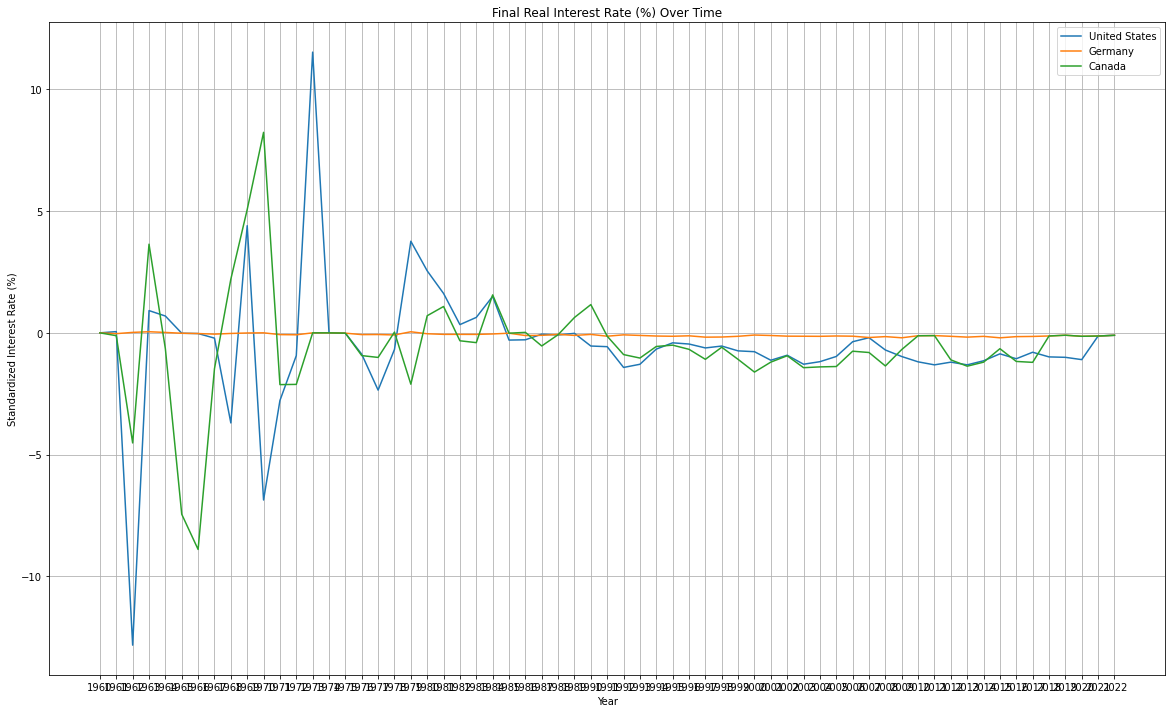

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3 países más importantes.
countries_to_plot = ['United States', 'Germany', 'Canada']
data_to_plot = interest_countries[interest_countries['Country Name'].isin(countries_to_plot)]

plt.figure(figsize=(20, 12))
for country in countries_to_plot:
    subset = data_to_plot[data_to_plot['Country Name'] == country]
    plt.plot(subset.columns[2:], subset.iloc[0, 2:], label=country)  

plt.title('Final Real Interest Rate (%) Over Time')
plt.xlabel('Year')
plt.ylabel('Standardized Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

### Comparación entre Regiones

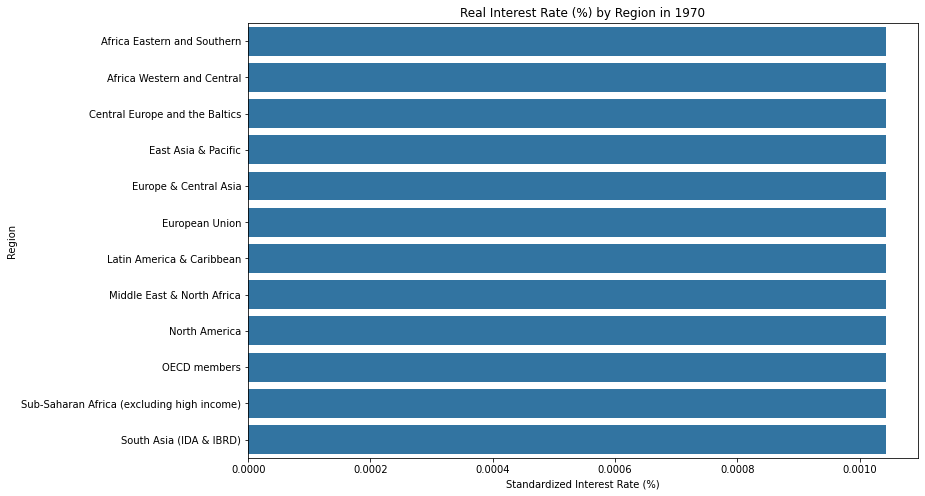

In [16]:
regions_data_1970 = interest_regions[['Country Name', '1970']]  

plt.figure(figsize=(12, 8))
sns.barplot(x='1970', y='Country Name', data=regions_data_1970)
plt.title('Real Interest Rate (%) by Region in 1970')
plt.xlabel('Standardized Interest Rate (%)')
plt.ylabel('Region')
plt.show()

### Tendencia Mundial

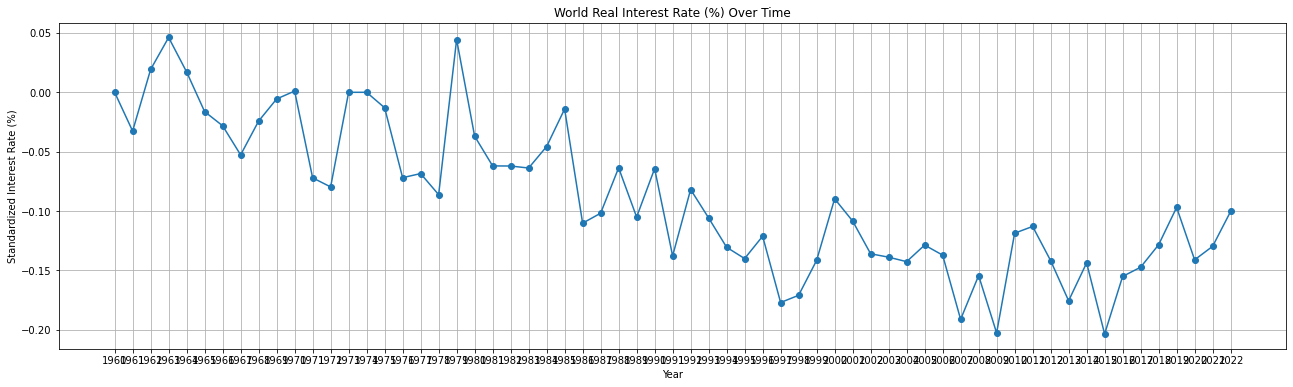

In [17]:
plt.figure(figsize=(22, 6))
plt.plot(interest_world.columns[2:], interest_world.iloc[0, 2:], marker='o')  
plt.title('World Real Interest Rate (%) Over Time')
plt.xlabel('Year')
plt.ylabel('Standardized Interest Rate (%)')
plt.grid(True)
plt.show()

# Será lento

Country Name  Africa Eastern and Southern  Africa Western and Central  \
count                            9.000000                    9.000000   
mean                            -0.138408                   -0.138408   
std                              0.031571                    0.031571   
min                             -0.203477                   -0.203477   
25%                             -0.147272                   -0.147272   
50%                             -0.141043                   -0.141043   
75%                             -0.128340                   -0.128340   
max                             -0.096908                   -0.096908   

Country Name  Central Europe and the Baltics  East Asia & Pacific  \
count                               9.000000             9.000000   
mean                               -0.138408            -0.138408   
std                                 0.031571             0.031571   
min                                -0.203477            -0.203477 

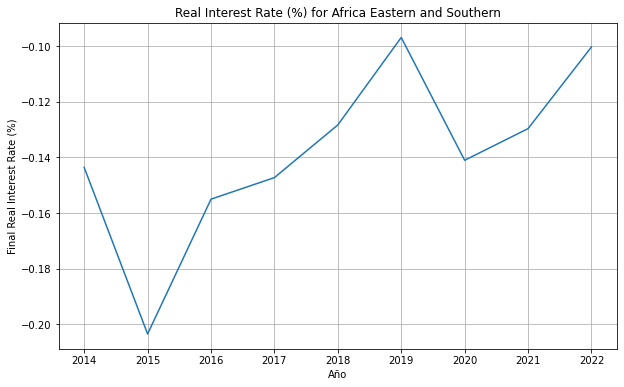

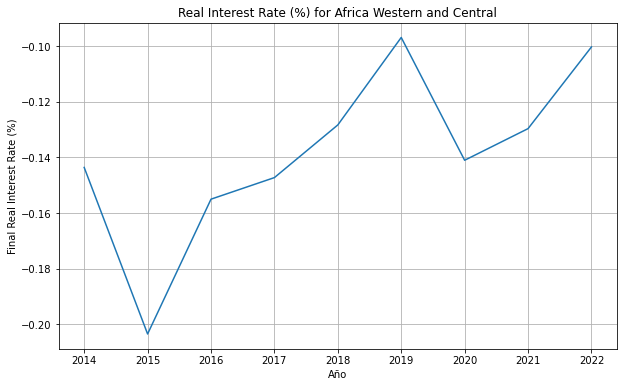

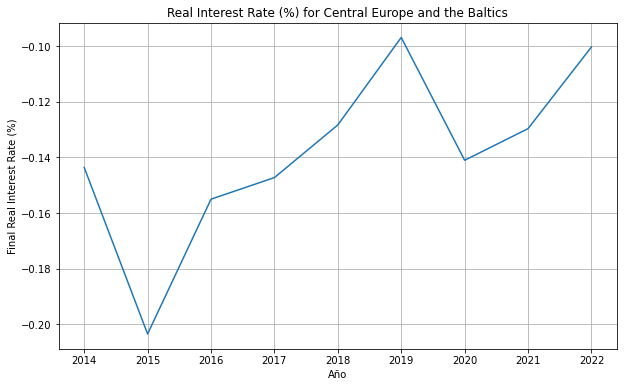

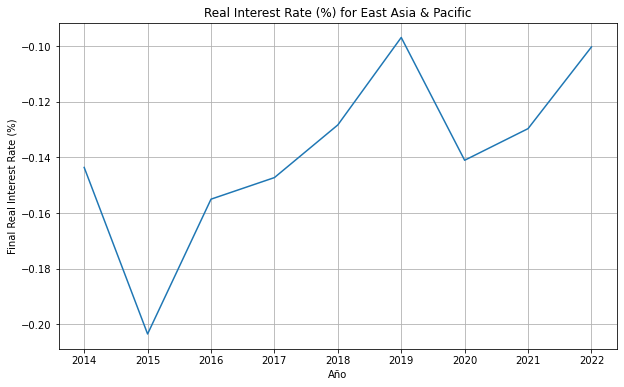

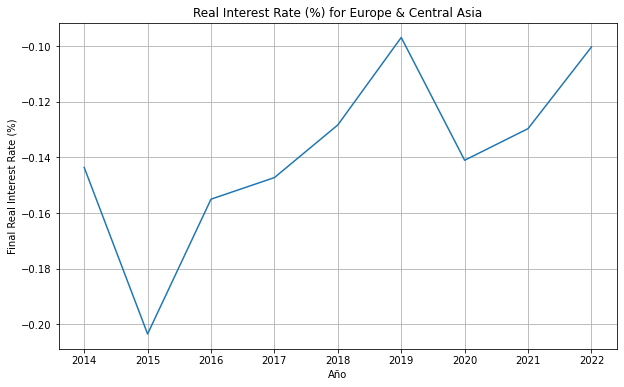

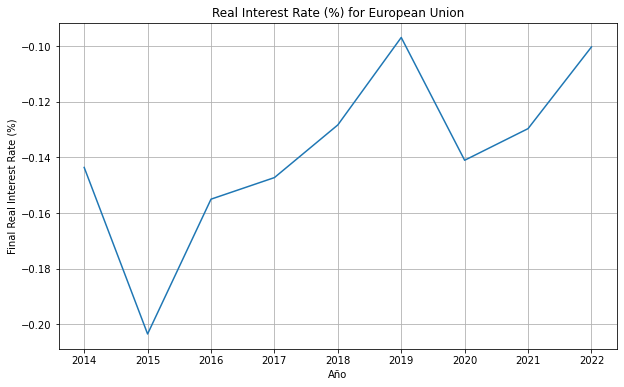

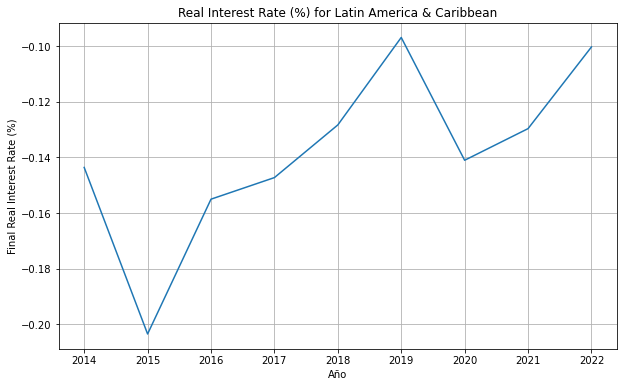

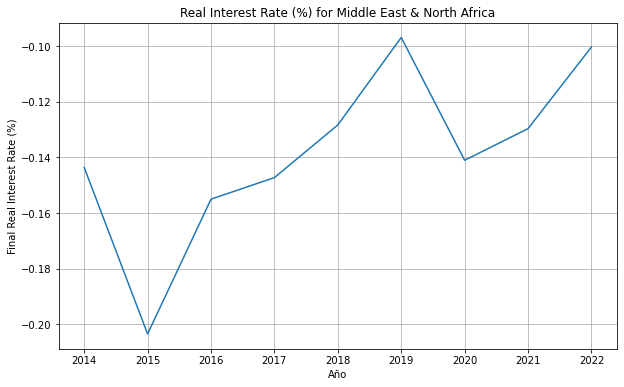

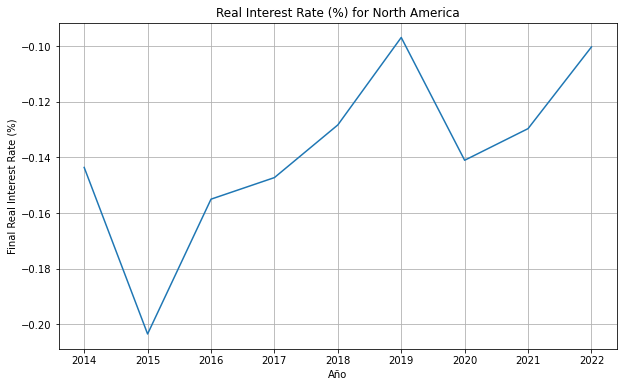

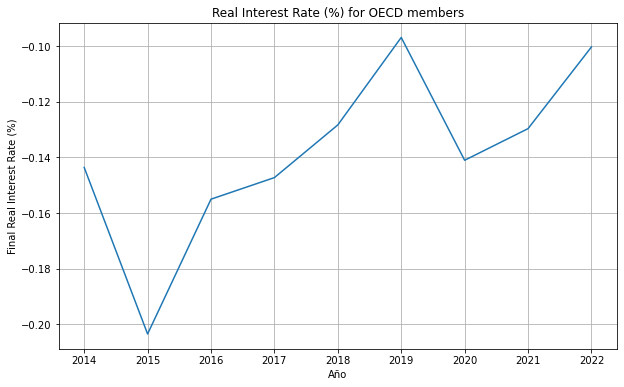

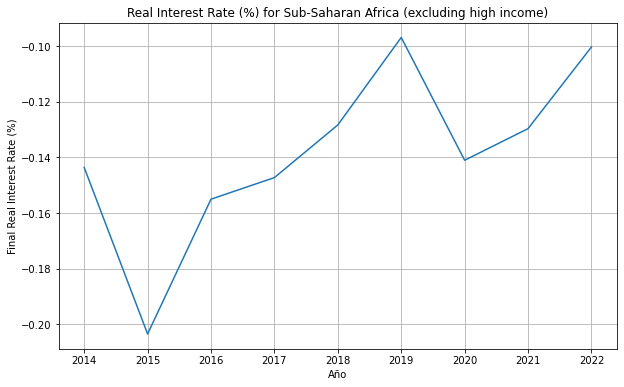

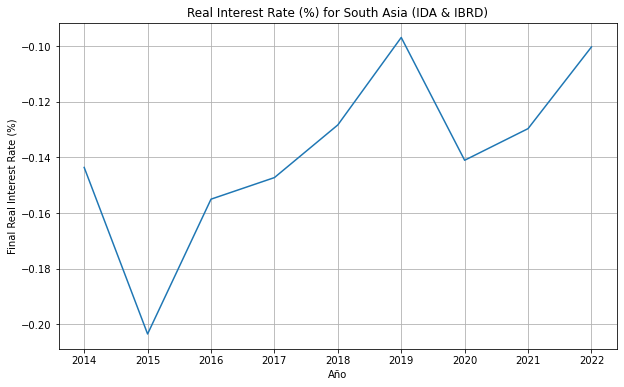

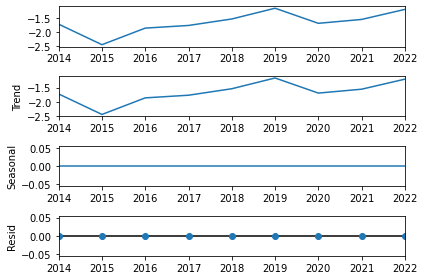

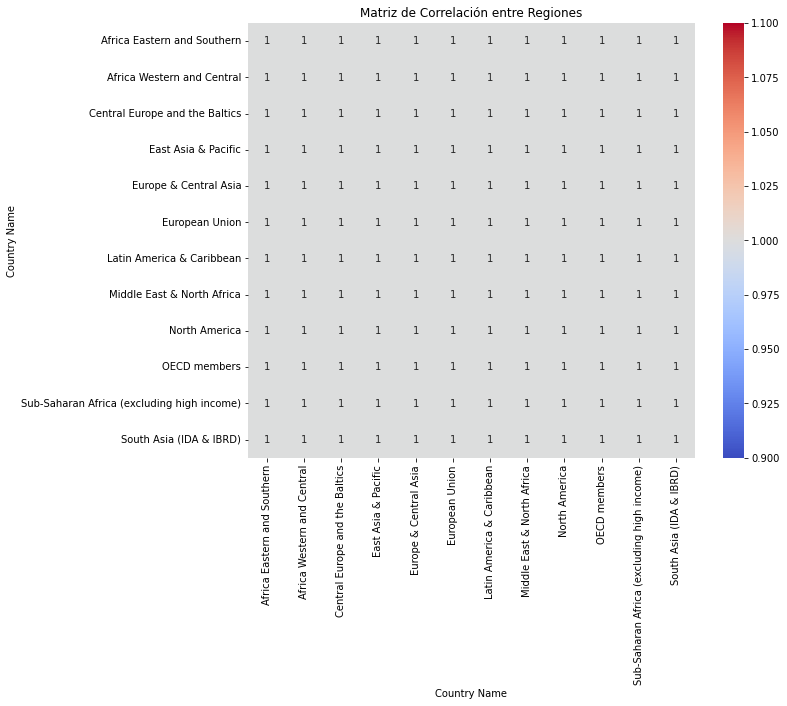

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

years = [str(year) for year in range(2014, 2023)]
interest_filtered = interest_regions.set_index('Country Name')[years].transpose()

# Resumen estadístico
print(interest_filtered.describe())

# Gráficos de series temporales para cada país
for column in interest_filtered.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(interest_filtered.index, interest_filtered[column])
    plt.title(f'Real Interest Rate (%) for {column}')
    plt.xlabel('Año')
    plt.ylabel('Final Real Interest Rate (%)')
    plt.grid(True)
    plt.show()

# Descomposición de series temporales del total agregado
result = seasonal_decompose(interest_filtered.sum(axis=1), model='additive', period=1)
result.plot()
plt.show()

# Correlación entre regiones
plt.figure(figsize=(10, 8))
sns.heatmap(interest_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Regiones')
plt.show()